___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways. Also, you will calibrate your model outputs.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

After the ML Deployment Course, you will able to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The dataset was collected from credit card transactions made by European cardholders, with sensitive information removed to ensure privacy and compliance with ethical guidelines. It has **285,000** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for small amount of all transactions.

**Feature Information:**

- **time:** Data for two days in seconds .
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will prapare your model for deployment.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)

import plotly.io as pio
import plotly.express as px
import plotly.offline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

import pickle


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df0=pd.read_csv('drive/MyDrive/creditcard.csv')

In [3]:
df0=pd.read_csv('creditcard.csv')

In [4]:
df0.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
def first_looking(df):
    print('Shape: ', df.shape,"\n",'*'*100,"\n\n","Info:\n", sep = '')
    print(df.info(),'\n', '*'*100,"\n\n",'Missing Values:\n', sep='')
    print(df.isnull().sum(),'\n','*'*100,"\n\n", 'Number of Uniques:\n', sep='')
    print(df.nunique(),'\n','*'*100,"\n\n", "Column Names:", sep='')
    print(df.columns,'\n','*'*100,"\n\n" , sep='')
    print('Duplicated Values:', df.duplicated().sum(),'\n\n', '*'*100,"\n\n",'Numeric Columns:', sep='')
    print(df.select_dtypes(include='number').columns.tolist(),'\n\n', '*'*100,"\n\n",'Categoric Columns', sep='')
    print(df.select_dtypes(include='object').columns.tolist())

In [6]:
first_looking(df0)

Shape: (284807, 31)
****************************************************************************************************

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64


In [5]:
df=df0.copy()

In [6]:
df[df.duplicated()].value_counts("Class")

Class
0    1062
1      19
Name: count, dtype: int64

In [9]:
df['Class'].value_counts(dropna=False)

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
print('No Frauds', round(df0['Class'].value_counts()[0]/len(df0) * 100,2), '% of the dataset')
print('Frauds', round(df0['Class'].value_counts()[1]/len(df0) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


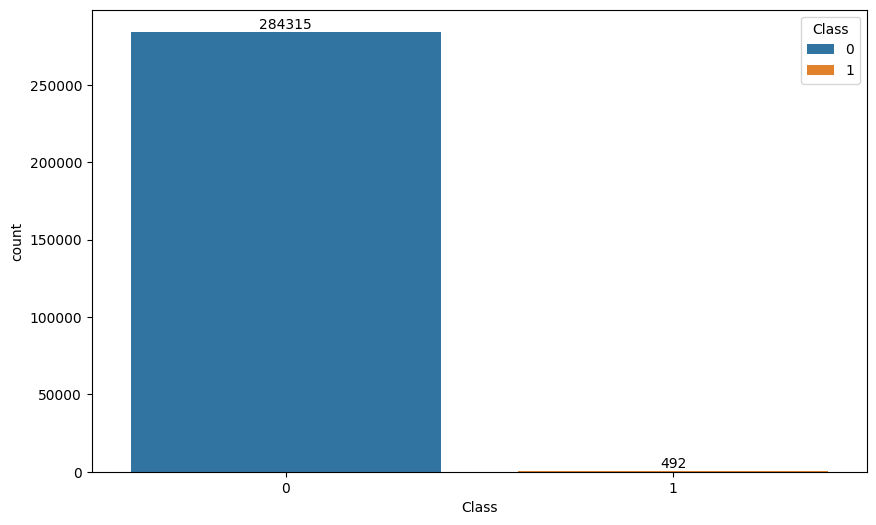

In [11]:
ax=sns.countplot(x=df0['Class'], hue=df0['Class'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

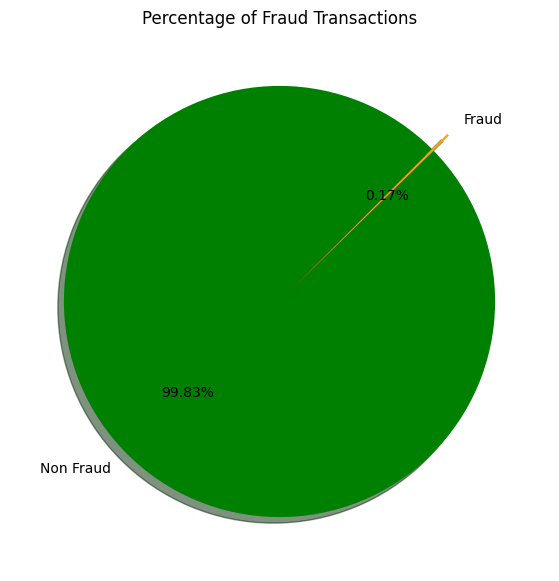

In [12]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df.Class.value_counts(normalize=True),
        labels = ["Non Fraud","Fraud"], explode = (0, 0.1),autopct='%1.2f%%',shadow=True, startangle=45,
        colors=['green', 'orange'])
plt.title("Percentage of Fraud Transactions")
plt.show()

Our dataset is highly imbalanced with 284,315 instances of class 0 and 492 instances of class 1. This imbalance is already a challenge and needs to be managed properly to avoid biasing the model towards the majority class.
There are 1062 duplicates in class 0 and 19 duplicates in class 1.
Duplicates in the majority class (class 0) might not have as significant an impact as duplicates in the minority class (class 1).
Dropping duplicates in class 0 will reduce redundancy and may help in making the dataset slightly less biased.
However, removing duplicates in class 1 could potentially remove valuable data pointsgiven the already small size of the minority class.
That's why we are dropping duplicates in Class 0 only to reduce redundancy without impacting the already limited minority class. This can also help in balancing the dataset slightly more, though the imbalance will still be significant.

In [7]:
class_0 = df[df['Class'] == 0].drop_duplicates()
class_1 = df[df['Class'] == 1]
df= pd.concat([class_0, class_1])

In [8]:
df.shape

(283745, 31)

In [ ]:
df.describe().T

count          mean           std         min           25%  \
Time    283745.0  94810.629752  47479.710012    0.000000  54208.000000   
V1      283745.0      0.005141      1.951316  -56.407510     -0.916191   
V2      283745.0     -0.003529      1.648781  -72.715728     -0.600272   
V3      283745.0      0.000636      1.514705  -48.325589     -0.889801   
V4      283745.0     -0.002546      1.415196   -5.683171     -0.850082   
V5      283745.0      0.001293      1.379224 -113.743307     -0.690003   
V6      283745.0     -0.001175      1.332279  -26.160506     -0.769102   
V7      283745.0      0.000773      1.236046  -43.557242     -0.552676   
V8      283745.0     -0.001454      1.190455  -73.216718     -0.208838   
V9      283745.0     -0.001867      1.096214  -13.434066     -0.644310   
V10     283745.0     -0.002194      1.081450  -24.588262     -0.535655   
V11     283745.0      0.000596      1.019936   -4.797473     -0.761587   
V12     283745.0     -0.001394      0.998854  -18.683715     -0.406347   
V13     283745.0      0.000571      0.995434   -5.791881     -0.647896   
V14     283745.0     -0.000441      0.956360  -19.214325     -0.425813   
V15     283745.0      0.001003      0.914915   -4.498945     -0.581468   
V16     283745.0      0.000653      0.876217  -14.129855     -0.466972   
V17     283745.0     -0.000614      0.848850  -25.162799     -0.484012   
V18     283745.0      0.001216      0.838264   -9.498746     -0.498100   
V19     283745.0     -0.000199      0.813502   -7.213527     -0.456283   
V20     283745.0      0.000158      0.770179  -54.497720     -0.211477   
V21     283745.0      0.000089      0.733504  -34.830382     -0.228302   
V22     283745.0     -0.000135      0.725583  -10.933144     -0.542715   
V23     283745.0      0.000289      0.624098  -44.807735     -0.161705   
V24     283745.0      0.000210      0.605618   -2.836627     -0.354468   
V25     283745.0     -0.000228      0.521219  -10.295397     -0.317476   
V26     283745.0      0.000155      0.482067   -2.604551     -0.326759   
V27     283745.0      0.001702      0.396580  -22.565679     -0.070642   
V28     283745.0      0.000548      0.328085  -15.430084     -0.052821   
Amount  283745.0     88.472178    250.393576    0.000000      5.600000   
Class   283745.0      0.001734      0.041605    0.000000      0.000000   

                 50%            75%            max  
Time    84695.000000  139297.000000  172792.000000  
V1          0.020241       1.316034       2.454930  
V2          0.063994       0.800414      22.057729  
V3          0.179928       1.026882       9.382558  
V4         -0.022112       0.739927      16.875344  
V5         -0.053571       0.612182      34.801666  
V6         -0.275211       0.396794      73.301626  
V7          0.040783       0.570453     120.589494  
V8          0.021903       0.325737      20.007208  
V9         -0.052596       0.595876      15.594995  
V10        -0.093271       0.453505      23.745136  
V11        -0.032122       0.739710      12.018913  
V12         0.139033       0.616933       7.848392  
V13        -0.012937       0.663121       7.126883  
V14         0.050123       0.492272      10.526766  
V15         0.049262       0.650078       8.877742  
V16         0.067077       0.523492      17.315112  
V17        -0.065917       0.398924       9.253526  
V18        -0.002218       0.501935       5.041069  
V19         0.003416       0.458562       5.591971  
V20        -0.062353       0.133234      39.420904  
V21        -0.029436       0.186220      27.202839  
V22         0.006675       0.528260      10.503090  
V23        -0.011154       0.147765      22.528412  
V24         0.041015       0.439710       4.584549  
V25         0.016303       0.350669       7.519589  
V26        -0.052173       0.240270       3.517346  
V27         0.001480       0.091217      31.612198  
V28         0.011288       0.078281      33.847808  
Amount     22.000000      77.520000   25691.160000  

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [15]:
!pip install deepchecks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.2 MB/s eta 0:00:00
  Created wheel for PyNomaly: filename=PyNomaly-0.3.3-py3-none-any.whl size=8480 sha256=675d0aef0ee40849d715774661eb621252651e0ca77a41fd231333d06b5706fc
  Stored in directory: /root/.cache/pip/wheels/2b/49/68/62eb262833c0fd5403d3b258bd259b0f71516d2563a960303f
Successfully built PyNomaly
  Attempting uninstall:

In [16]:
from deepchecks.tabular import Dataset
ds = Dataset(df, cat_features= [], label= 'Class')

In [ ]:
from deepchecks.tabular.suites import data_integrity
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

### Exploratory Data Analysis

### Time and Amount

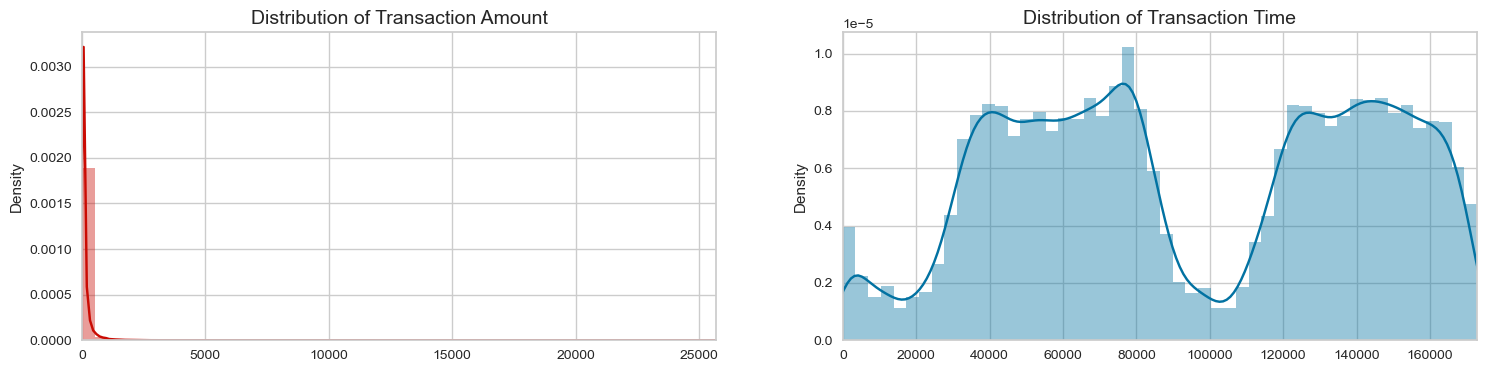

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['Amount'].values
time_val = df['Time'].values
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)]);

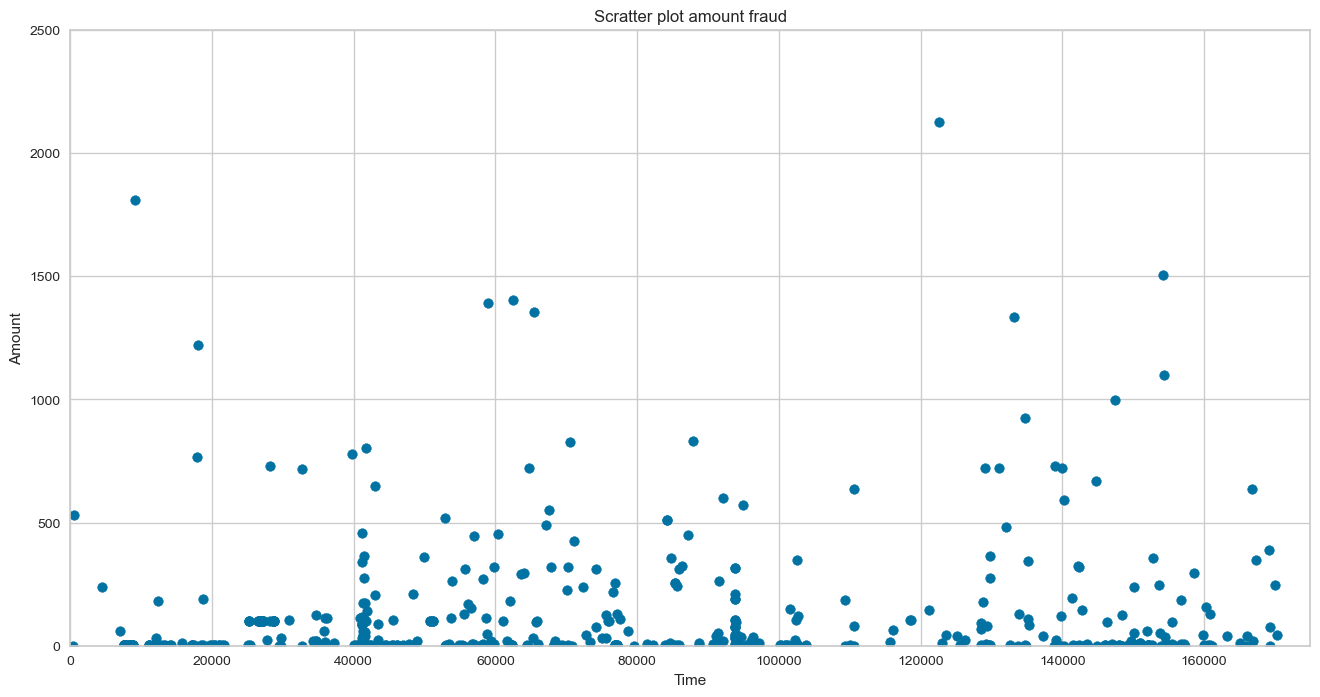

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(16,8))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

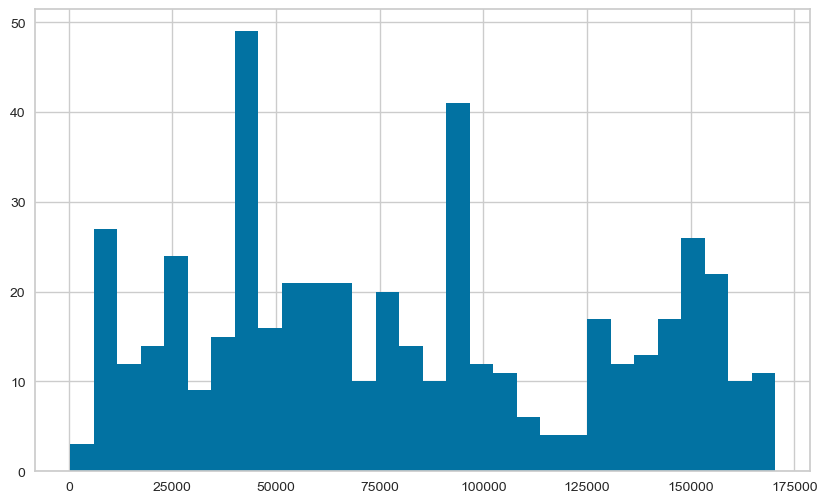

In [ ]:
plt.hist(df_fraud['Time'], bins=30);

In [ ]:
df.loc[df['Class']==1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

From this graph, we understand that the Fraud class transactions do not occur at a specific time period; they can be seen at any hour of the day. Fraud transactions are generally carried out with low amounts, with an average of 122 units.

In [ ]:
df['Class'].corr(df['Amount'])

0.005615739039588613

In [ ]:
df['Class'].corr(df['Time'])

-0.012345008315668225

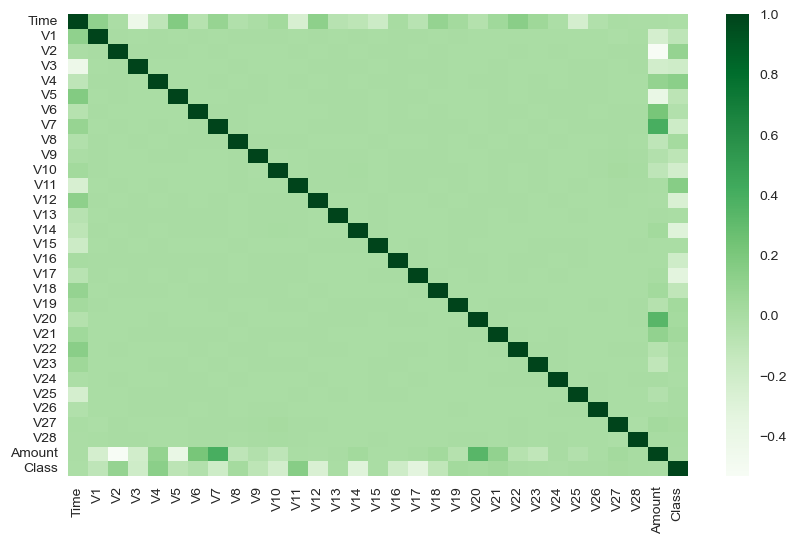

In [ ]:
sns.heatmap(df.corr(), cmap='Greens');

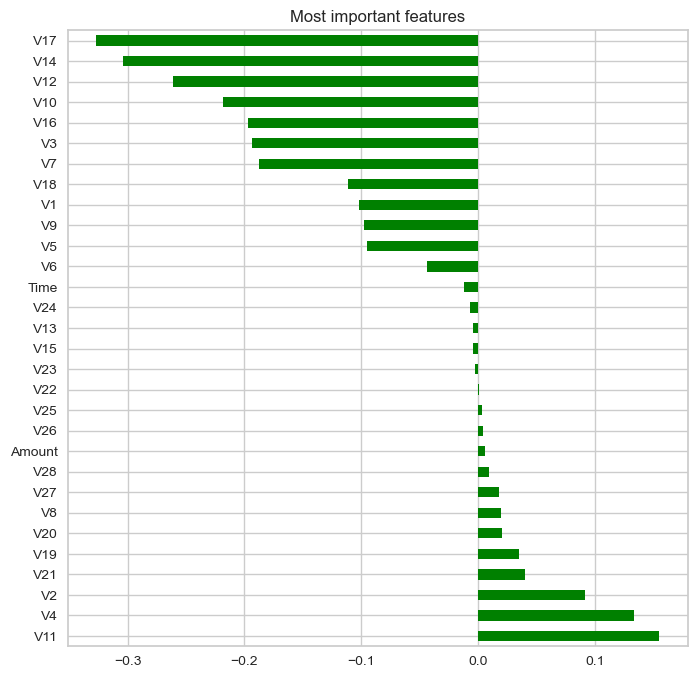

In [ ]:
plt.figure(figsize=(8,8))
df.corr()['Class'][:-1].sort_values(ascending=False).plot(kind='barh', title='Most important features', color = "green")
plt.show()

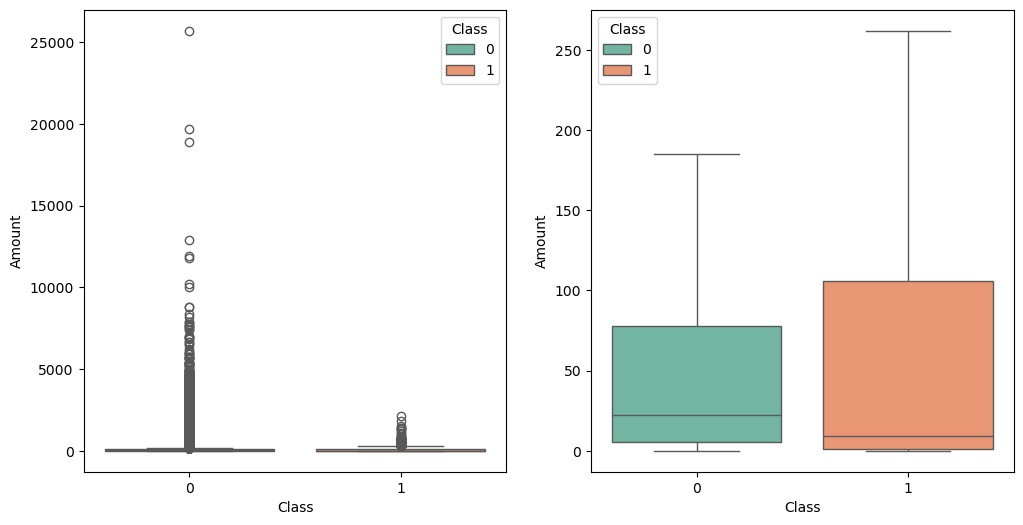

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="Set2",showfliers=True)
sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="Set2",showfliers=False)
plt.show();

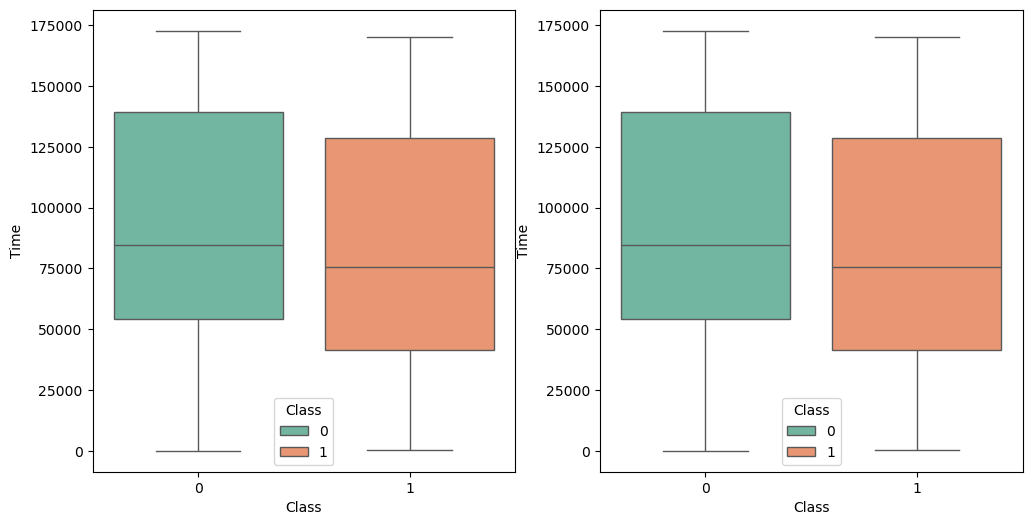

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Class", y="Time", hue="Class",data=df, palette="Set2",showfliers=True)
sns.boxplot(ax = ax2, x="Class", y="Time", hue="Class",data=df, palette="Set2",showfliers=False)
plt.show();

### Data Cleaning
Check Missing Values and Outliers

In [ ]:
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
IQR = q3 - q1

upper_limit = q3 + (1.5*IQR)
lower_limit = q1 - (1.5*IQR)

print(upper_limit)
print(lower_limit)


185.39999999999998
-102.28


In [ ]:
outlier_count = ((df['Amount']<lower_limit) | (df['Amount']>upper_limit)).sum()
outlier_count

31688

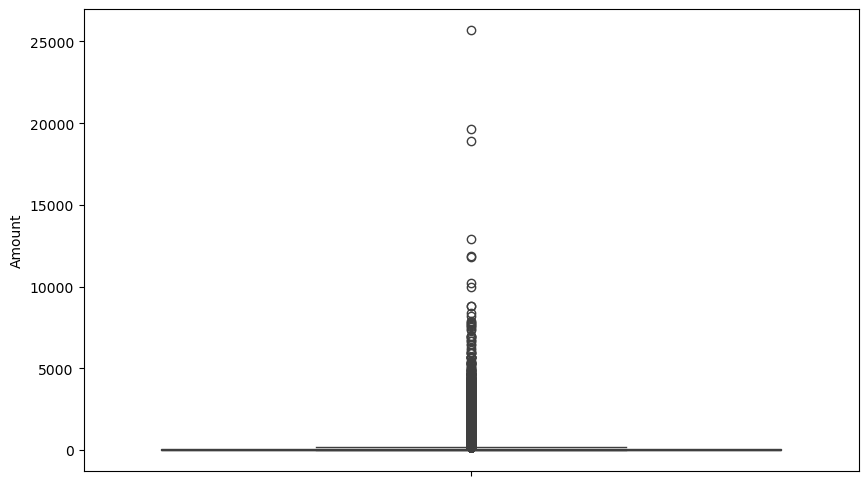

In [ ]:
sns.boxplot(df['Amount']);

1. After analysing the time feature we decided that it should be droped. Because it has very low correlations with target feature.

2. The credit card fraudsters tend to keep transactions bellow a certain amount (less than $2500), so, compared to all the other transactions these Amounts can be considered as outliers and can be deleted.

In [9]:
df.drop(columns= ['Time'], axis=1, inplace=True)

In [10]:
df[df['Amount']>=2500].Amount.count()

449

In [11]:
df=df.loc[df['Amount']<=2500]

In [12]:
df.shape

(283305, 30)

In [13]:
df['Class'].value_counts()

Class
0    282813
1       492
Name: count, dtype: int64

## 2. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.

In [14]:
df1=df.drop(['Class'], axis=1)
df1.head(1)

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   

        V24       V25       V26       V27       V28  Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62  

[1 rows x 29 columns]

In [15]:
scaler = StandardScaler()
df1_scaled= scaler.fit_transform(df1)


In [16]:
df1_scaled

array([[-0.71711471, -0.0558018 ,  1.69091049, ...,  0.34482625,
        -0.06744934,  0.36403286],
       [ 0.61274647,  0.16198651,  0.10560965, ..., -0.02653111,
         0.04423089, -0.43399244],
       [-0.7163574 , -0.87018654,  1.18041663, ..., -0.14733614,
        -0.18824937,  1.60802466],
       ...,
       [-0.36080653,  0.71473723, -1.48658999, ...,  1.00017656,
         0.60497696, -0.02555644],
       [-1.63126674,  0.36742558, -3.6178564 , ...,  2.30220153,
        -0.79366841,  0.8820731 ],
       [ 1.02974771,  0.09279763, -1.73392497, ...,  0.00465561,
        -0.04951843, -0.21760826]])

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform


def hopkins(X, ratio=0.05):
    """
    Compute the Hopkins statistic for the given dataframe X.
    Hopkins statistic is a measure of the randomness of a data set.
    It is calculated as the ratio of the sum of the distances to the nearest neighbors
    of the uniform random sample to the sum of the distances to the nearest neighbors of
    the original data sample.
    The value of the Hopkins statistic is between 0 and 1, with a value of 0 indicating
    that the data is not random and a value of 1 indicating that the data is completely random.
    The Hopkins statistic is a good measure of the randomness of a data set,
    as it can be used to determine if a data set is random or not.

    Parameters:
    X (pandas.DataFrame): Input dataframe
    ratio (float, optional): Ratio of the uniform random sample to the original data sample. Defaults to 0.05.

    Returns:
    float: Hopkins statistic
    """

    if not isinstance(X, np.ndarray):
        X = X.values  # convert dataframe to a numpy array
    sample_size = int(
        X.shape[0] * ratio
    )  # 0.05 (5%) based on paper by Lawson and Jures

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1])
    )

    # a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[:, 0]  # distance to the first (nearest) neighbour

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

In [ ]:
result = []
for _ in range(10):
    result.append(hopkins(df1_scaled, 0.05))

np.mean(result)

0.9859276991938166

In [ ]:
def elbow_vis(X, k_range=range(1, 10), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42, n_init='auto')
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

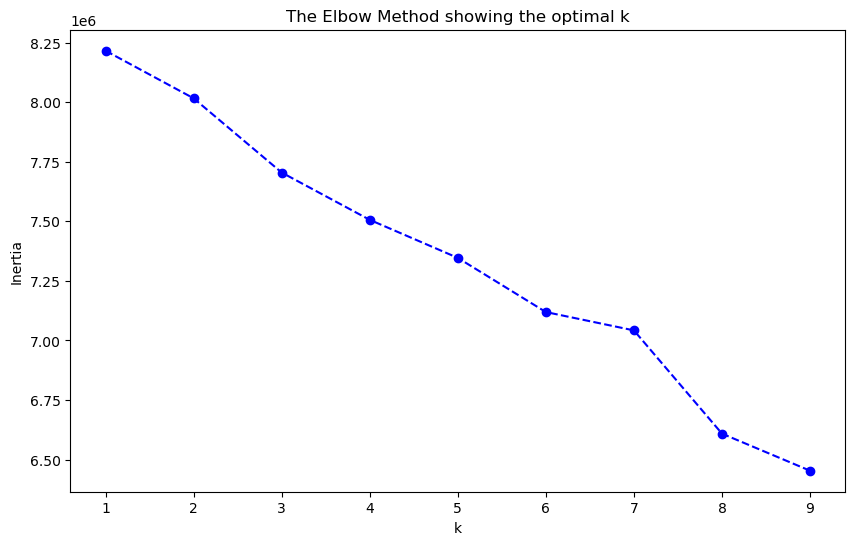

In [ ]:
elbow_vis(df1_scaled)

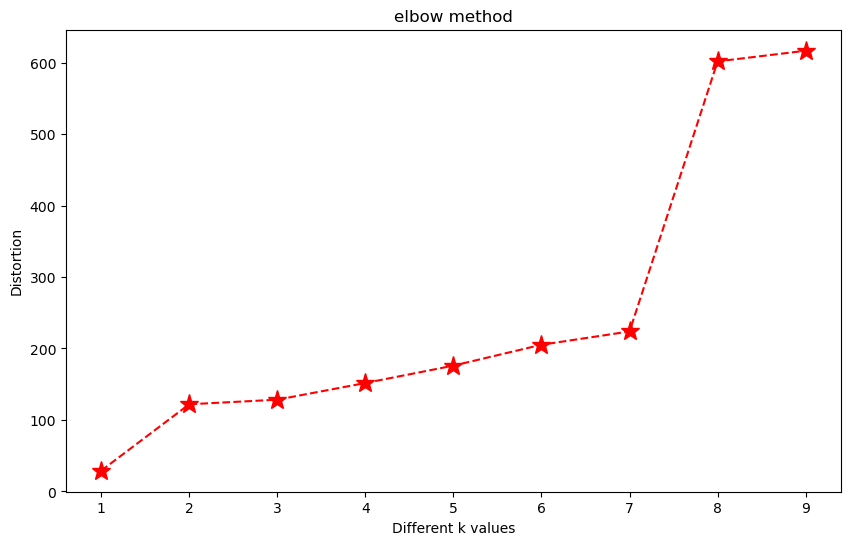

In [ ]:
elbow_vis(df1_scaled, inertia=False)

In [ ]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k,random_state=42, n_init='auto' )
    model.fit(df1_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.4411670511088757
Silhouette Score for 3 clusters: 0.05538193272888051
Silhouette Score for 4 clusters: 0.05209813223051917
Silhouette Score for 5 clusters: 0.04044053855382424
Silhouette Score for 6 clusters: 0.046843695509154196
Silhouette Score for 7 clusters: 0.04757114333268915
Silhouette Score for 8 clusters: 0.06523656105491027
Silhouette Score for 9 clusters: 0.0654522842108522


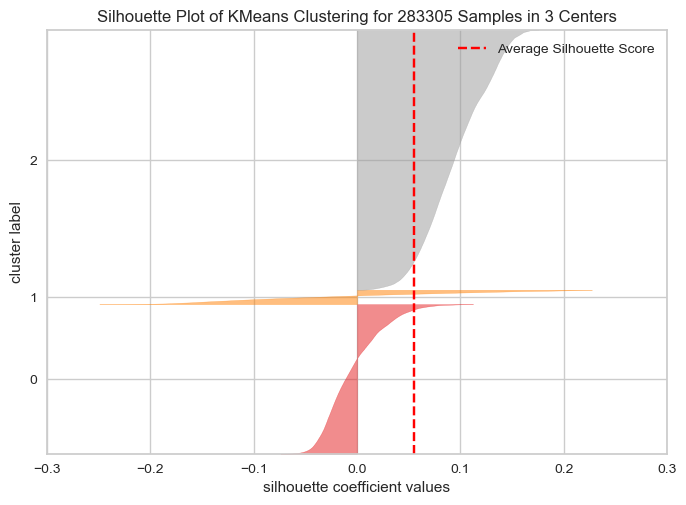

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42, n_init='auto')
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df1_scaled)  # Fit the data to the visualizer
visualizer.poof();

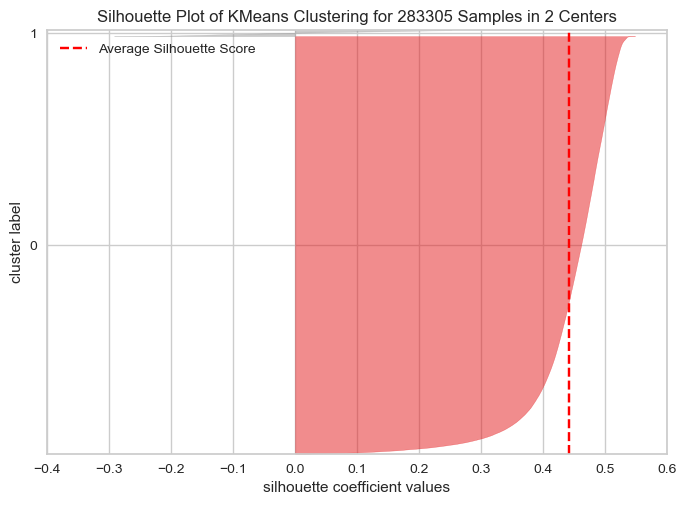

In [17]:
from numpy import prod
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=2, random_state=42, n_init='auto')
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df1_scaled)  # Fit the data to the visualizer
visualizer.poof();

In [18]:
model_2 = KMeans(n_clusters = 2, random_state = 42, n_init='auto' )
model_2.fit_predict(df1_scaled)
labels=model_2.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [19]:
df['kmeans_clusters']=labels
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  kmeans_clusters  
0 -0.189115  0.133558 -0.021053  149.62      0                0  
1  0.125895 -0.008983  0.014724    2.69      0                0  
2 -0.139097 -0.055353 -0.059752  378.66      0                0  
3 -0.221929  0.062723  0.061458  123.50      0                0  
4  0.502292  0.219422  0.215153   69.99      0                0  

[5 rows x 31 columns]

In [20]:
df['kmeans_clusters'].value_counts()

kmeans_clusters
0    279362
1      3943
Name: count, dtype: int64

In [21]:
df['Class'].value_counts()

Class
0    282813
1       492
Name: count, dtype: int64

In [22]:
df.groupby(df['Class'])['kmeans_clusters'].value_counts()

Class  kmeans_clusters
0      0                  278906
       1                    3907
1      0                     456
       1                      36
Name: count, dtype: int64

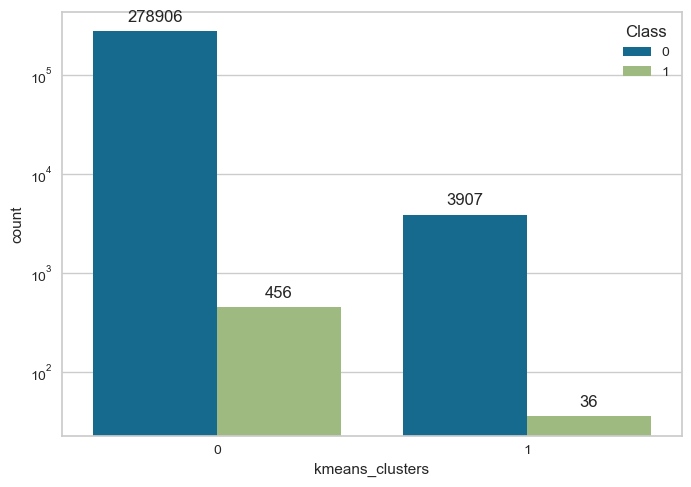

In [29]:
ax=sns.countplot(x=df['kmeans_clusters'], hue=df['Class'], dodge=True)


ax.set_yscale('log')

# Çubukların üstünde sayıları göstermek için
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Yalnızca pozitif yükseklikler için
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center', xytext = (0, 10),
                    textcoords = 'offset points')

# Grafiği göster
plt.show()


In [30]:
df.drop(['kmeans_clusters'], axis=1, inplace=True)

## 3. Data Preprocessing

#### Train - Test Split

In [31]:
df.shape

(283305, 30)

In [26]:
X = df.drop('Class',axis=1)
y = df['Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=101)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [28]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [29]:
ds_train = Dataset(df_train, label='Class', cat_features=[])
ds_test =  Dataset(df_test,  label='Class', cat_features=[])

In [ ]:
from deepchecks.tabular.suites import full_suite
suite = full_suite()
suite.run(train_dataset=ds_train, test_dataset=ds_test)

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

#### Scaling

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 4. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [32]:
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [33]:
log_model = LogisticRegression(random_state=101)
log_model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=101)

***iii. Prediction and Model Evaluating  and Tuning***

In [34]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56557     6]
 [   42    56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.90      0.57      0.70        98

    accuracy                           1.00     56661
   macro avg       0.95      0.79      0.85     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226215     35]
 [   146    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       0.88      0.63      0.73       394

    accuracy                           1.00    226644
   macro avg       0.94      0.81      0.87    226644
weighted avg       1.00      1.00      1.00    226644



In [35]:
scores = cross_validate(log_model,
                        X_train_scaled,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.999188
train_accuracy     0.999200
test_precision     0.864906
train_precision    0.874695
test_recall        0.631346
train_recall       0.629995
test_f1            0.727483
train_f1           0.732419
dtype: float64


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


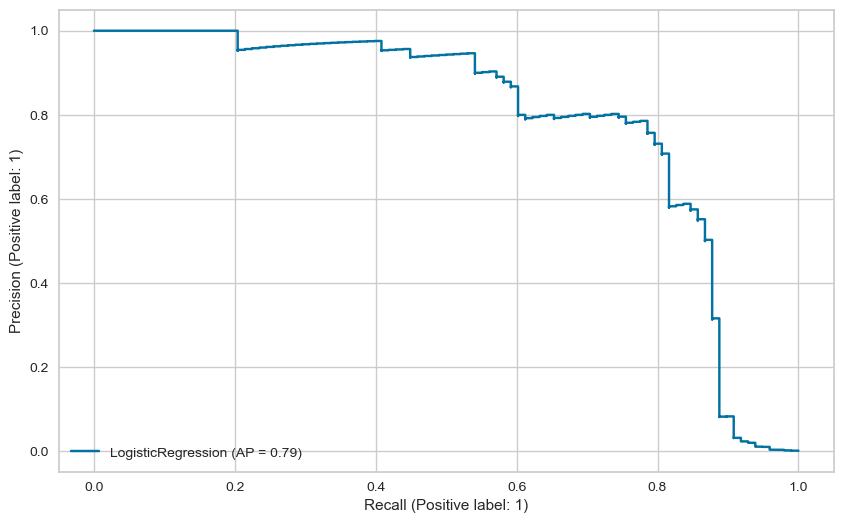

In [ ]:
PrecisionRecallDisplay.from_estimator(log_model, X_test_scaled, y_test);

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [36]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, log_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### Logistic Regression with Imbalanced Data Techniques

***i. Train-Test Split (Again)***

In [120]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=101)

In [121]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***ii. Model Training***

In [98]:
log_weight_model = LogisticRegression(class_weight='balanced', random_state=101)
log_weight_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', random_state=101)

***Prediction and Model Evaluating and Tuning***

In [99]:
eval_metric(log_weight_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[55226  1337]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56563
           1       0.06      0.91      0.12        98

    accuracy                           0.98     56661
   macro avg       0.53      0.94      0.55     56661
weighted avg       1.00      0.98      0.99     56661


Train_Set
[[220621   5629]
 [    31    363]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226250
           1       0.06      0.92      0.11       394

    accuracy                           0.98    226644
   macro avg       0.53      0.95      0.55    226644
weighted avg       1.00      0.98      0.99    226644



In [100]:
scores = cross_validate(log_weight_model,
                        X_train_scaled,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.974718
train_accuracy     0.974961
test_precision     0.059601
train_precision    0.060661
test_recall        0.913526
train_recall       0.923293
test_f1            0.111872
train_f1           0.113829
dtype: float64

***iv.  Plot Precision and Recall Curve***


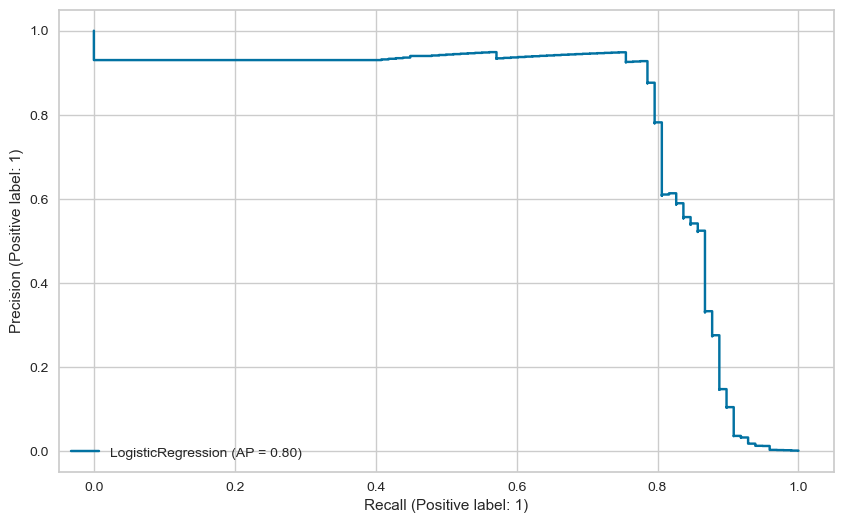

In [ ]:
PrecisionRecallDisplay.from_estimator(log_weight_model, X_test_scaled, y_test);

In [ ]:
df['Class'].value_counts()

Class
0    282813
1       492
Name: count, dtype: int64

In [ ]:
class0=283805/(2*282813)
class1=283805/(2*492)
print(class0)
print(class1)

0.5017538090540392
288.4197154471545


In [ ]:
# Verilen sınıf frekansları
class_freq_0 = 0.5017538090540392
class_freq_1 = 288.4197154471545

# Frekansları normalize etme
total_freq = class_freq_0 + class_freq_1
normalized_freq_0 = class_freq_0 / total_freq
normalized_freq_1 = class_freq_1 / total_freq

# Ağırlıkları ters orantılı olarak hesaplama
class_weight_0 = 1 / normalized_freq_0
class_weight_1 = 1 / normalized_freq_1

# Ağırlıkları normalize etme
total_weight = class_weight_0 + class_weight_1
class_weight_0 = class_weight_0 / total_weight
class_weight_1 = class_weight_1 / total_weight

# Ağırlık sözlüğü oluşturma
class_weights = {0: class_weight_0, 1: class_weight_1}

print(f'Class weights: {class_weights}')


Class weights: {0: 0.9982633557473395, 1: 0.0017366442526605599}


In [101]:
log_w_model = LogisticRegression(class_weight={0: 1, 1: 9}, random_state=101)
log_w_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight={0: 1, 1: 9}, random_state=101)

In [102]:
eval_metric(log_w_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56543    20]
 [   20    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.80      0.80      0.80        98

    accuracy                           1.00     56661
   macro avg       0.90      0.90      0.90     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226158     92]
 [    72    322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       0.78      0.82      0.80       394

    accuracy                           1.00    226644
   macro avg       0.89      0.91      0.90    226644
weighted avg       1.00      1.00      1.00    226644



In [ ]:
scores = cross_validate(log_w_model,
                        X_train_scaled,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.999268
train_accuracy     0.999271
test_precision     0.781508
train_precision    0.774570
test_recall        0.809295
train_recall       0.819228
test_f1            0.793366
train_f1           0.796241
dtype: float64

### Log_w_model GridSearch

StratifiedKFold, makine öğrenmesi modelinin eğitim ve değerlendirme süreçlerinde kullanılan çapraz doğrulama (cross-validation) yöntemlerinden biridir. Temel amacı, veri setini, her bir katmanın (fold) orijinal veri setindeki sınıf dağılımını koruyacak şekilde bölmektir. Bu, özellikle sınıf dağılımının dengesiz olduğu durumlarda modelin daha tutarlı ve güvenilir performans ölçümleri sağlamasına yardımcı olur.

In [103]:
from sklearn.model_selection import StratifiedKFold
class_weights_custom = {0: 1, 1: 9}
model = LogisticRegression(random_state=101, class_weight=class_weights_custom, max_iter=10000)

skf = StratifiedKFold(n_splits=5, random_state=101, shuffle=True)

param_grid = {"penalty" :["l1", "l2"],
              "C" : [np.logspace(-1, 5, 20),1],
              "solver":["lbfgs", "liblinear", "sag"]
             }

# to get the best model
grid_log_cwc_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=skf,
                          scoring = 'recall',
                          n_jobs = -1)
grid_log_cwc_model.fit(X_train_scaled,y_train)
grid_log_cwc_model.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [104]:
eval_metric(grid_log_cwc_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56543    20]
 [   20    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.80      0.80      0.80        98

    accuracy                           1.00     56661
   macro avg       0.90      0.90      0.90     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226158     92]
 [    72    322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       0.78      0.82      0.80       394

    accuracy                           1.00    226644
   macro avg       0.89      0.91      0.90    226644
weighted avg       1.00      1.00      1.00    226644



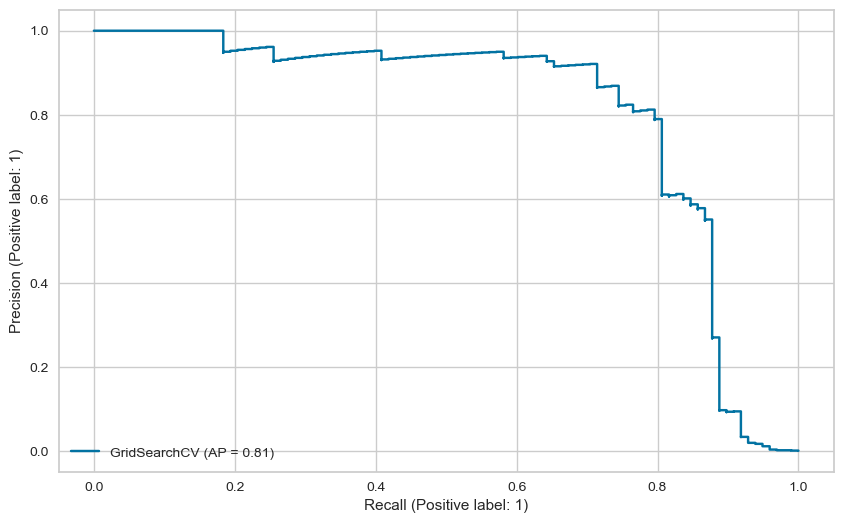

In [ ]:
PrecisionRecallDisplay.from_estimator(grid_log_cwc_model, X_test_scaled, y_test);

In [105]:
y_pred = grid_log_cwc_model.predict(X_test)
y_pred_proba = grid_log_cwc_model.predict_proba(X_test)
y_train_pred_proba = grid_log_cwc_model.predict_proba(X_train)

log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

In [106]:
my_dict = {"Label": y_test, "Prediction":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [107]:
pd.DataFrame.from_dict(my_dict).sample(10)

Label  Prediction   Proba_1   Proba_0
8212        0           0  0.002270  0.997730
40673       0           1  0.998641  0.001359
184013      0           1  1.000000  0.000000
138102      0           0  0.002505  0.997495
128270      0           0  0.308120  0.691880
250298      0           0  0.001587  0.998413
258358      0           0  0.006716  0.993284
261826      0           1  1.000000  0.000000
134001      0           1  0.999954  0.000046
9688        0           0  0.214217  0.785783

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [156]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, grid_log_cwc_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

In [ ]:
calibrated_log = CalibratedClassifierCV(grid_log_cwc_model,cv='prefit', method='sigmoid')
calibrated_log.fit(X_train_scaled, y_train)

CalibratedClassifierCV(cv='prefit',
                       estimator=GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
                                              estimator=LogisticRegression(class_weight={0: 1,
                                                                                         1: 9},
                                                                           max_iter=10000,
                                                                           random_state=101),
                                              n_jobs=-1,
                                              param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                                                1],
                                                          'penalty': ['l1',
                                                                      'l2'],
                                                          'solver': ['lbfgs',
                                                                     'liblinear',
                                                                     'sag']},
                                              scoring='recall'))

In [ ]:
eval_metric(calibrated_log, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56560     3]
 [   41    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.95      0.58      0.72        98

    accuracy                           1.00     56661
   macro avg       0.97      0.79      0.86     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226216     34]
 [   150    244]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       0.88      0.62      0.73       394

    accuracy                           1.00    226644
   macro avg       0.94      0.81      0.86    226644
weighted avg       1.00      1.00      1.00    226644



In [ ]:
from sklearn.metrics import brier_score_loss
y_pred = calibrated_log.predict_proba(X_test)[:,1]
print('Brier Loss is',brier_score_loss(y_test, y_pred))

Brier Loss is 0.41737964098972735


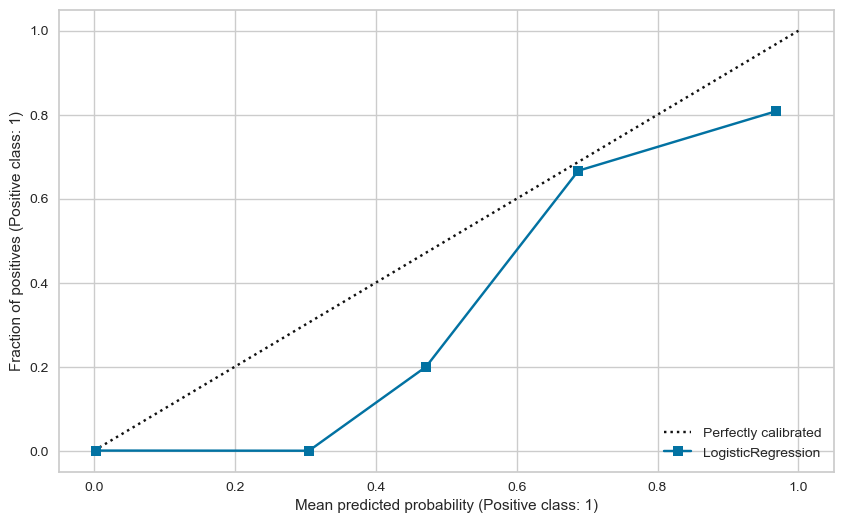

In [ ]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(log_w_model, X_test_scaled, y_test)
plt.show()

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,class_weight="balanced",random_state=101)

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [ ]:
eval_metric(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56562     1]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.99      0.74      0.85        98

    accuracy                           1.00     56661
   macro avg       0.99      0.87      0.92     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226250      0]
 [     1    393]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       1.00      1.00      1.00       394

    accuracy                           1.00    226644
   macro avg       1.00      1.00      1.00    226644
weighted avg       1.00      1.00      1.00    226644



In [ ]:
class_weights_custom = {0: 1, 1: 9}
rf_model_cwc = RandomForestClassifier(random_state=101, class_weight=class_weights_custom)
rf_model_cwc.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 9}, random_state=101)

***ii. Prediction and Model Evaluating and Tuning***

In [ ]:
eval_metric(rf_model_cwc, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56561     2]
 [   23    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56661
   macro avg       0.99      0.88      0.93     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226250      0]
 [     1    393]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       1.00      1.00      1.00       394

    accuracy                           1.00    226644
   macro avg       1.00      1.00      1.00    226644
weighted avg       1.00      1.00      1.00    226644



In [ ]:
scores = cross_validate(rf_model_cwc,
                        X_train_scaled,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 5,
                        return_train_score=True
                       ,n_jobs = -1)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.999537
train_accuracy     1.000000
test_precision     0.950733
train_precision    1.000000
test_recall        0.774132
train_recall       1.000000
test_f1            0.852680
train_f1           1.000000
dtype: float64

In [ ]:
class_weights_custom = {0: 1, 1: 9}
model= RandomForestClassifier(random_state=101, class_weight=class_weights_custom)
param_grid = {'n_estimators':[30,50],
               "criterion":["entropy","gini"],
            "max_features":['sqrt',"log2"],
             'max_depth':[2,3,4]}

rf_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=3,
                          scoring = "recall",
                          n_jobs = -1,
                          return_train_score=True)
rf_grid_model.fit(X_train, y_train)
rf_grid_model.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 9}, criterion='entropy',
                       max_depth=3, n_estimators=30, random_state=101)

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[56556     7]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.92      0.78      0.84        98

    accuracy                           1.00     56661
   macro avg       0.96      0.89      0.92     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226195     55]
 [    80    314]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       0.85      0.80      0.82       394

    accuracy                           1.00    226644
   macro avg       0.93      0.90      0.91    226644
weighted avg       1.00      1.00      1.00    226644



***iii. Plot Precision and Recall Curve***


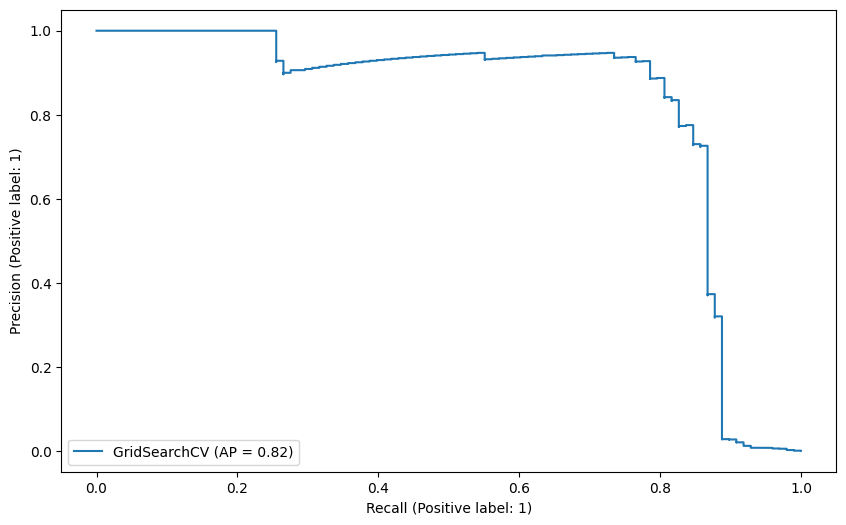

In [ ]:
PrecisionRecallDisplay.from_estimator(rf_grid_model, X_test_scaled, y_test);

In [ ]:
y_pred = rf_grid_model.predict(X_test)
y_pred_proba = rf_grid_model.predict_proba(X_test)
y_train_pred_proba = rf_grid_model.predict_proba(X_train)

rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

In [ ]:
data = {'Metric': ['RF_F1', 'RF_Recall', 'RF_AP'],
        'Value': [rf_f1, rf_recall, rf_AP]}
dfs = pd.DataFrame(data)
dfs.to_csv('RF_metrics.csv', index=False)

In [ ]:
my_dict = {"Label": y_test, "Prediction":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [ ]:
pd.DataFrame.from_dict(my_dict).sample(10)

Label  Prediction   Proba_1   Proba_0
273063      0           0  0.002638  0.997362
155807      0           0  0.004585  0.995415
205710      0           0  0.002166  0.997834
145865      0           0  0.180704  0.819296
138794      0           0  0.002383  0.997617
279162      0           0  0.004026  0.995974
134458      0           0  0.002629  0.997371
5677        0           0  0.005183  0.994817
121438      0           0  0.001918  0.998082
271542      0           0  0.005171  0.994829

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, rf_grid_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 34 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 34 seconds


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

In [ ]:
calibrated_log = CalibratedClassifierCV(rf_grid_model,cv='prefit', method='sigmoid')
calibrated_log.fit(X_train_scaled, y_train)

CalibratedClassifierCV(cv='prefit',
                       estimator=GridSearchCV(cv=3,
                                              estimator=RandomForestClassifier(class_weight={0: 1,
                                                                                             1: 9},
                                                                               random_state=101),
                                              n_jobs=-1,
                                              param_grid={'criterion': ['entropy',
                                                                        'gini'],
                                                          'max_depth': [2, 3,
                                                                        4],
                                                          'max_features': ['sqrt',
                                                                           'log2'],
                                                          'n_estimators': [30,
                                                                           50]},
                                              return_train_score=True,
                                              scoring='recall'))

In [ ]:
eval_metric(calibrated_log, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56559     4]
 [   28    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.95      0.71      0.81        98

    accuracy                           1.00     56661
   macro avg       0.97      0.86      0.91     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226207     43]
 [   106    288]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       0.87      0.73      0.79       394

    accuracy                           1.00    226644
   macro avg       0.93      0.87      0.90    226644
weighted avg       1.00      1.00      1.00    226644



In [ ]:
from sklearn.metrics import brier_score_loss
y_pred = calibrated_log.predict_proba(X_test)[:,1]
print('Brier Loss is',brier_score_loss(y_test, y_pred))

Brier Loss is 0.0005111548304911141


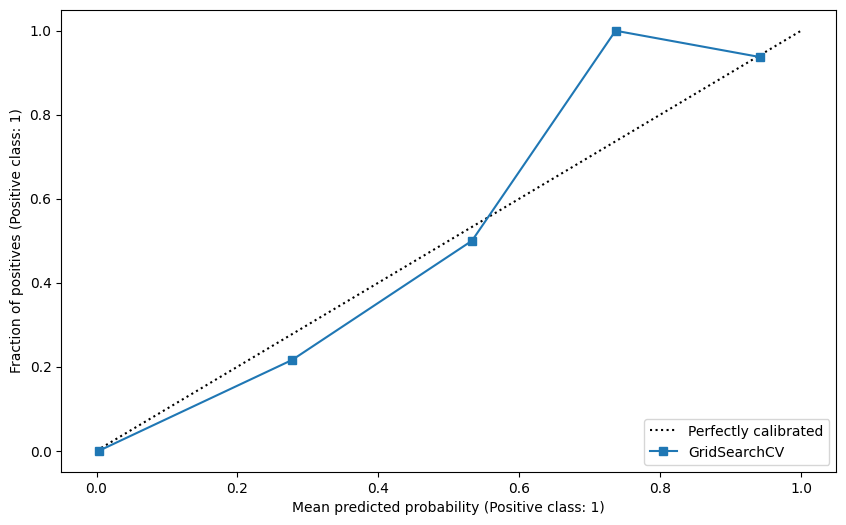

In [ ]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(rf_grid_model, X_test_scaled, y_test)
plt.show()

### XGBoost Classifier with Imbalanced Data Techniques

***i. Model Training***

In [37]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(class_weight='balanced', random_state=101)

xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
eval_metric(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56558     5]
 [   20    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.94      0.80      0.86        98

    accuracy                           1.00     56661
   macro avg       0.97      0.90      0.93     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226250      0]
 [     0    394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       1.00      1.00      1.00       394

    accuracy                           1.00    226644
   macro avg       1.00      1.00      1.00    226644
weighted avg       1.00      1.00      1.00    226644



In [ ]:
class_weights_custom = {0: 1, 1: 9}
xgb_model_cwc = XGBClassifier(random_state=101, class_weight=class_weights_custom)
xgb_model_cwc.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 9}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

***ii. Prediction and Model Evaluating and Tuning***

In [ ]:
eval_metric(xgb_model_cwc, X_train, y_train, X_test, y_test)

Test_Set
[[56556     7]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56661
   macro avg       0.96      0.91      0.93     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226202     48]
 [    64    330]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       0.87      0.84      0.85       394

    accuracy                           1.00    226644
   macro avg       0.94      0.92      0.93    226644
weighted avg       1.00      1.00      1.00    226644



In [ ]:
scores = cross_validate(xgb_model_cwc,
                        X_train_scaled,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True
                       ,n_jobs = -1)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.999563
train_accuracy     1.000000
test_precision     0.952217
train_precision    1.000000
test_recall        0.789038
train_recall       1.000000
test_f1            0.861973
train_f1           1.000000
dtype: float64

In [41]:
class_weights_custom = {0: 1, 1: 8}

model= XGBClassifier(random_state=101, class_weight=class_weights_custom)
param_grid = {
    "n_estimators": [30,50],
    "max_depth": [2,3,4],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.5, 0.8, 1],
    "colsample_bytree": [0.5, 0.7, 1]
}

xgb_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring = "recall",
                          n_jobs = -1,
                          return_train_score=True)
xgb_grid_model.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight={0: 1, 1: 8},
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=N...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [2, 3, 4],
                         'n_estimators': [30, 50], 'subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='recall')

In [42]:
xgb_grid_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 8}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=1, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [43]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)


Test_Set
[[56558     5]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56661
   macro avg       0.97      0.90      0.93     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226236     14]
 [    67    327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       0.96      0.83      0.89       394

    accuracy                           1.00    226644
   macro avg       0.98      0.91      0.94    226644
weighted avg       1.00      1.00      1.00    226644



***iii. Plot Precision and Recall Curve***

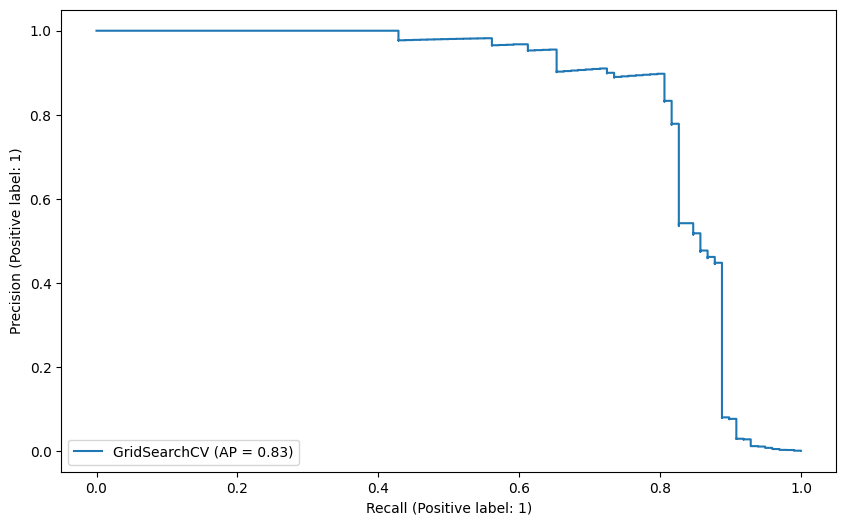

In [44]:
PrecisionRecallDisplay.from_estimator(xgb_grid_model, X_test_scaled, y_test);

In [45]:
y_pred = xgb_grid_model.predict(X_test)
y_pred_proba = xgb_grid_model.predict_proba(X_test)
y_train_pred_proba = xgb_grid_model.predict_proba(X_train)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

In [46]:
my_dict = {"Label": y_test, "Prediction":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [48]:
pd.DataFrame.from_dict(my_dict).sample(10)

Label  Prediction   Proba_1   Proba_0
243779      0           0  0.000051  0.999949
230833      0           0  0.000183  0.999817
222331      0           0  0.000172  0.999828
26438       0           0  0.000022  0.999978
142343      0           0  0.000212  0.999788
165315      0           0  0.000039  0.999961
257030      0           0  0.000184  0.999816
26380       0           0  0.000054  0.999946
57020       0           0  0.000078  0.999922
201673      0           0  0.000258  0.999742

In [49]:
data = {'Metric': ['XGB_F1', 'XGB_Recall', 'XGB_AP'],
        'Value': [xgb_f1, xgb_recall, xgb_AP]}
dfs = pd.DataFrame(data)
dfs.to_csv('XGB_metrics.csv', index=False)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [50]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_grid_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 23 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 23 seconds


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

In [51]:
calibrated_log = CalibratedClassifierCV(xgb_grid_model,cv='prefit', method='sigmoid')
calibrated_log.fit(X_train_scaled, y_train)

CalibratedClassifierCV(cv='prefit',
                       estimator=GridSearchCV(cv=5,
                                              estimator=XGBClassifier(base_score=None,
                                                                      booster=None,
                                                                      callbacks=None,
                                                                      class_weight={0: 1,
                                                                                    1: 8},
                                                                      colsample_bylevel=None,
                                                                      colsample_bynode=None,
                                                                      colsample_bytree=None,
                                                                      device=None,
                                                                      early_stopping_rounds=None,
                                                                      enable_categorical=False,
                                                                      eval_metric=None,
                                                                      feature_types=None,
                                                                      gamma=None,
                                                                      grow_policy=None,
                                                                      i...
                                                                      max_depth=None,
                                                                      max_leaves=None,
                                                                      min_child_weight=None,
                                                                      missing=nan,
                                                                      monotone_constraints=None,
                                                                      multi_strategy=None,
                                                                      n_estimators=None,
                                                                      n_jobs=None,
                                                                      num_parallel_tree=None, ...),
                                              n_jobs=-1,
                                              param_grid={'colsample_bytree': [0.5,
                                                                               0.7,
                                                                               1],
                                                          'learning_rate': [0.1,
                                                                            0.2],
                                                          'max_depth': [2, 3,
                                                                        4],
                                                          'n_estimators': [30,
                                                                           50],
                                                          'subsample': [0.5,
                                                                        0.8,
                                                                        1]},
                                              return_train_score=True,
                                              scoring='recall'))

In [52]:
eval_metric(calibrated_log, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56556     7]
 [   28    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56563
           1       0.91      0.71      0.80        98

    accuracy                           1.00     56661
   macro avg       0.95      0.86      0.90     56661
weighted avg       1.00      1.00      1.00     56661


Train_Set
[[226206     44]
 [    89    305]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226250
           1       0.87      0.77      0.82       394

    accuracy                           1.00    226644
   macro avg       0.94      0.89      0.91    226644
weighted avg       1.00      1.00      1.00    226644



In [53]:
from sklearn.metrics import brier_score_loss
y_pred = calibrated_log.predict_proba(X_test)[:,1]
print('Brier Loss is',brier_score_loss(y_test, y_pred))

Brier Loss is 0.0003981893874663292


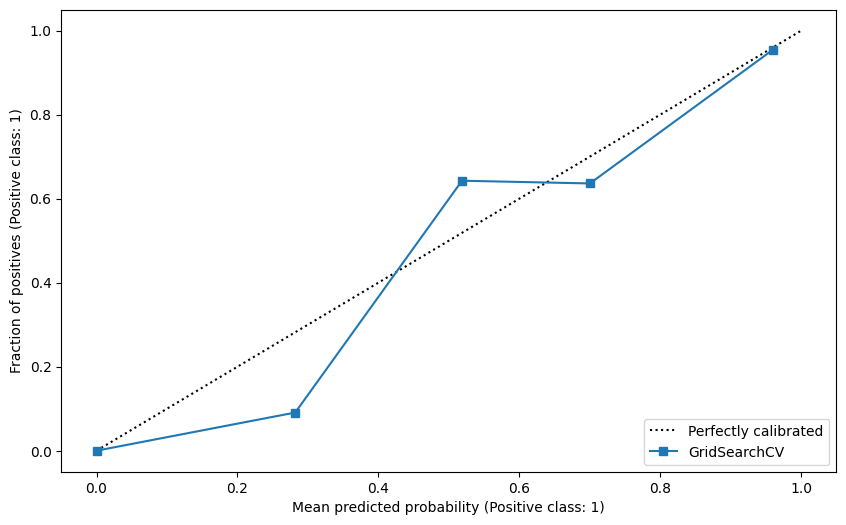

In [54]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(xgb_grid_model, X_test_scaled, y_test)
plt.show()

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map.

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

***ii. Define Model***

In [56]:
SEED = 42
tf.keras.utils.set_random_seed(SEED)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.30,
    random_state=SEED
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    stratify=y_train,
    test_size=0.20,
    random_state=SEED )

In [59]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
X_val_scaled= scaler.transform(X_val)

In [60]:
batch_size = 512

In [61]:
tf.random.set_seed(SEED)
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [64]:
early_stop = EarlyStopping(
    monitor="val_recall",
    mode="max",
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [65]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5008681925808998, 1: 288.45454545454544}

***iii. Fit Model***

In [66]:
model.fit(
    x=X_train_scaled,
    y=y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=batch_size,
    epochs=200,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights)

Epoch 1/200
310/310 [==============================] - 3s 4ms/step - loss: 0.4030 - recall: 0.9309 - val_loss: 0.3681 - val_recall: 0.8116
Epoch 2/200
310/310 [==============================] - 1s 3ms/step - loss: 0.1988 - recall: 0.8873 - val_loss: 0.1697 - val_recall: 0.8261
Epoch 3/200
310/310 [==============================] - 1s 3ms/step - loss: 0.1359 - recall: 0.9164 - val_loss: 0.1036 - val_recall: 0.8261
Epoch 4/200
310/310 [==============================] - 1s 4ms/step - loss: 0.1116 - recall: 0.9309 - val_loss: 0.0890 - val_recall: 0.8261
Epoch 5/200
310/310 [==============================] - 1s 5ms/step - loss: 0.0939 - recall: 0.9418 - val_loss: 0.0642 - val_recall: 0.8261
Epoch 6/200
310/310 [==============================] - 2s 6ms/step - loss: 0.0864 - recall: 0.9527 - val_loss: 0.0674 - val_recall: 0.8261
Epoch 7/200
310/310 [==============================] - 2s 6ms/step - loss: 0.0711 - recall: 0.9636 - val_loss: 0.0451 - val_recall: 0.8116
Epoch 8/200
310/310 [======

***iv. Prediction and Model Evaluating***

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1633 (6.38 KB)
Trainable params: 1633 (6.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss    recall  val_loss  val_recall
0  0.402978  0.930909  0.368149    0.811594
1  0.198789  0.887273  0.169679    0.826087
2  0.135898  0.916364  0.103604    0.826087
3  0.111554  0.930909  0.088979    0.826087
4  0.093886  0.941818  0.064198    0.826087

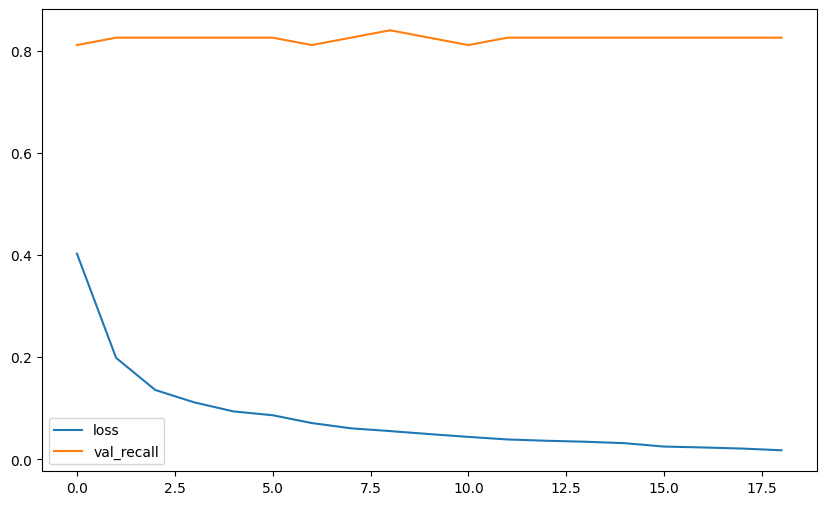

In [69]:
loss_df[["loss","val_recall"]].plot()
plt.show()

In [71]:
model.evaluate(X_test_scaled, y_test, verbose=0)


[0.0584372840821743, 0.912162184715271]

In [72]:
loss, Recall = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.0584372840821743
Recall:  0.912162184715271


In [74]:
y_pred = model.predict(X_test_scaled, verbose=0)
y_pred

array([[6.8555333e-02],
       [1.5288240e-02],
       [1.9109182e-02],
       ...,
       [1.4118408e-03],
       [7.0377846e-06],
       [1.8650559e-03]], dtype=float32)

In [75]:
y_pred = model.predict(X_test_scaled, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83388  1456]
 [   13   135]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84844
           1       0.08      0.91      0.16       148

    accuracy                           0.98     84992
   macro avg       0.54      0.95      0.57     84992
weighted avg       1.00      0.98      0.99     84992



***v. Plot Precision and Recall Curve***

2656/2656 [==============================] - 4s 1ms/step


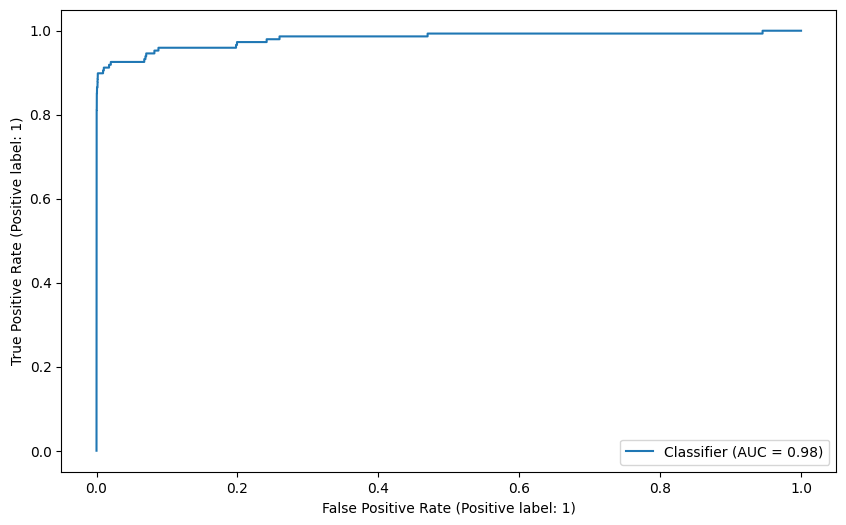

In [76]:
y_pred_proba = model.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# **with Optuna**

In [77]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam


In [79]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=10, restore_best_weights=True
)

In [80]:
tf.random.set_seed(SEED)
trial_metric = "Recall"

def create_model(trial):
    n_units1 = trial.suggest_int("n_units1", 8, 512)
    n_units2 = trial.suggest_int("n_units2", 8, 512)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1.3e-1, log=True)

    # Create a Sequential model
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train_scaled.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model  # Return the created model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_float("w0", 0.01, 5)
    w1 = trial.suggest_float("w1", 0.01, 5)

    model.fit(
        X_train_scaled,
        y_train,
        validation_data=(X_val_scaled, y_val),
        batch_size=batch_size,
        epochs=150,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_val_scaled, y_val, verbose=0)[1]
    return score

In [82]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00


In [83]:
import optuna
from optuna.samplers import TPESampler

In [84]:
study = optuna.create_study(direction="maximize")

study.optimize(objective, n_trials=7)

study.best_params

[I 2024-06-03 08:41:58,197] A new study created in memory with name: no-name-072ea945-a135-4ac0-8a74-e072d02afadb


Restoring model weights from the end of the best epoch: 19.
Epoch 29: early stopping


[I 2024-06-03 08:44:24,866] Trial 0 finished with value: 0.7101449370384216 and parameters: {'n_units1': 339, 'n_units2': 362, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0027864726817769113, 'w0': 1.288386398806465, 'w1': 0.5348391879151567}. Best is trial 0 with value: 0.7101449370384216.


Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping


[I 2024-06-03 08:45:50,895] Trial 1 finished with value: 0.782608687877655 and parameters: {'n_units1': 396, 'n_units2': 100, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00018912983590590372, 'w0': 0.5578755791821963, 'w1': 3.563435873665174}. Best is trial 1 with value: 0.782608687877655.


Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping


[I 2024-06-03 08:46:19,327] Trial 2 finished with value: 0.8115941882133484 and parameters: {'n_units1': 52, 'n_units2': 511, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0013840663113784753, 'w0': 0.13571874690541716, 'w1': 3.0992701649034764}. Best is trial 2 with value: 0.8115941882133484.


Restoring model weights from the end of the best epoch: 13.
Epoch 23: early stopping


[I 2024-06-03 08:48:48,732] Trial 3 finished with value: 0.782608687877655 and parameters: {'n_units1': 396, 'n_units2': 461, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.03757126387133767, 'w0': 2.672178586504813, 'w1': 2.9361958711441045}. Best is trial 2 with value: 0.8115941882133484.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2024-06-03 08:49:34,338] Trial 4 finished with value: 0.05797101557254791 and parameters: {'n_units1': 380, 'n_units2': 234, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00013234149270697945, 'w0': 2.3480752802114626, 'w1': 2.620330859138379}. Best is trial 2 with value: 0.8115941882133484.


Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping


[I 2024-06-03 08:50:36,251] Trial 5 finished with value: 0.6666666865348816 and parameters: {'n_units1': 222, 'n_units2': 269, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 4.6816029629949265e-05, 'w0': 2.7827060158141315, 'w1': 2.001974239046242}. Best is trial 2 with value: 0.8115941882133484.


Restoring model weights from the end of the best epoch: 16.
Epoch 26: early stopping


[I 2024-06-03 08:52:00,849] Trial 6 finished with value: 0.6666666865348816 and parameters: {'n_units1': 231, 'n_units2': 110, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 5.773773057436118e-05, 'w0': 1.5892254855117511, 'w1': 0.7129502379236962}. Best is trial 2 with value: 0.8115941882133484.


{'n_units1': 52,
 'n_units2': 511,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.0013840663113784753,
 'w0': 0.13571874690541716,
 'w1': 3.0992701649034764}

In [85]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=batch_size,
    epochs=200,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/200
310/310 [==============================] - 3s 8ms/step - loss: 0.0197 - recall: 0.1055 - val_loss: 0.0050 - val_recall: 0.5797
Epoch 2/200
310/310 [==============================] - 2s 7ms/step - loss: 0.0037 - recall: 0.7673 - val_loss: 0.0044 - val_recall: 0.6957
Epoch 3/200
310/310 [==============================] - 2s 7ms/step - loss: 0.0031 - recall: 0.8000 - val_loss: 0.0043 - val_recall: 0.6957
Epoch 4/200
310/310 [==============================] - 2s 7ms/step - loss: 0.0027 - recall: 0.7964 - val_loss: 0.0043 - val_recall: 0.6957
Epoch 5/200
310/310 [==============================] - 4s 12ms/step - loss: 0.0024 - recall: 0.7855 - val_loss: 0.0042 - val_recall: 0.7246
Epoch 6/200
310/310 [==============================] - 2s 8ms/step - loss: 0.0022 - recall: 0.8145 - val_loss: 0.0040 - val_recall: 0.7681
Epoch 7/200
310/310 [==============================] - 2s 7ms/step - loss: 0.0020 - recall: 0.8145 - val_loss: 0.0039 - val_recall: 0.7391
Epoch 8/200
310/310 [=====

In [86]:
history = model.history.history

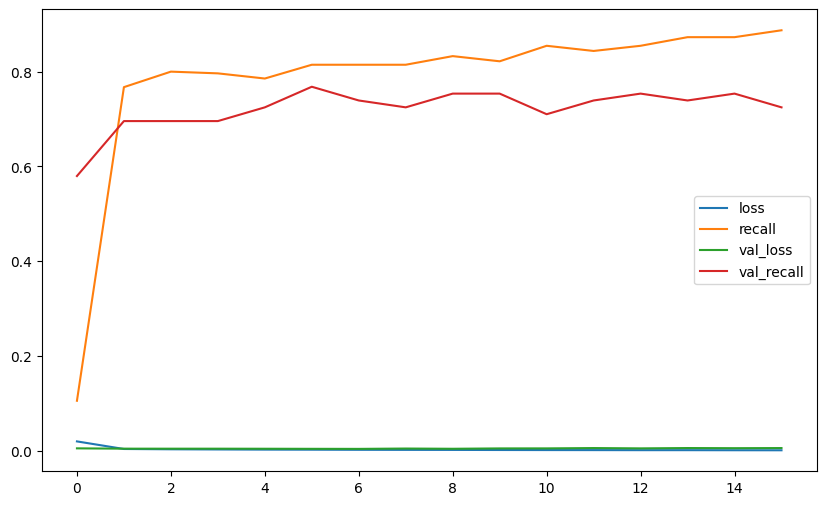

In [89]:
loss_df = pd.DataFrame(history)
loss_df.plot();

In [90]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2656/2656 [==============================] - 5s 2ms/step
[[84832    12]
 [   31   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84844
           1       0.91      0.79      0.84       148

    accuracy                           1.00     84992
   macro avg       0.95      0.90      0.92     84992
weighted avg       1.00      1.00      1.00     84992



2656/2656 [==============================] - 4s 2ms/step


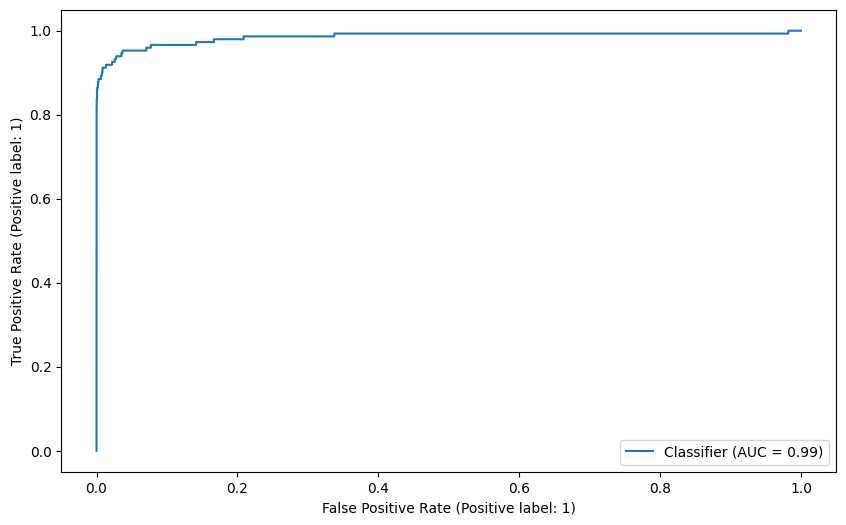

In [91]:
y_pred_proba = model.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [92]:
y_train_pred_proba = model.predict(X_train_scaled)
y_test_pred_proba = model.predict(X_test_scaled)

y_train_pred = (y_train_pred_proba > 0.5).astype("int32")
y_test_pred = (y_test_pred_proba > 0.5).astype("int32")

ANN_opt_f1 = f1_score(y_test, y_test_pred)
ANN_opt_recall = recall_score(y_test, y_test_pred)
ANN_opt_AP = average_precision_score(y_train, y_train_pred_proba)

2656/2656 [==============================] - 5s 2ms/step


***vi. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [93]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

2656/2656 [==============================] - 6s 2ms/step


1/1 [==============================] - 0s 24ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


313/313 [==============================] - 0s 2ms/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 621 seconds, but timeout was configured to 120 seconds
Skipping permutation importance calculation: calculation was projected to finish in 621 seconds, but timeout was configured to 120 seconds


32/32 [==============================] - 0s 2ms/step


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

## **Compare**

In [95]:
RF_metrics= pd.read_csv('/content/RF_metrics.csv')
RF_metrics

Metric     Value
0      RF_F1  0.839779
1  RF_Recall  0.775510
2      RF_AP  0.778106

In [109]:
compare = pd.DataFrame({"Model": ["log", "rf", "xgb", "ANN"],
                        "recall_score": [log_recall, RF_metrics.iloc[1,1], xgb_recall, ANN_opt_recall],
                        "f1_score": [log_f1, RF_metrics.iloc[0,1], xgb_f1, ANN_opt_f1],
                        "AP_score": [log_AP, RF_metrics.iloc[2,1], xgb_AP, ANN_opt_AP]})
compare

Model  recall_score  f1_score  AP_score
0   log      0.928571  0.006020  0.003671
1    rf      0.775510  0.839779  0.778106
2   xgb      0.806122  0.868132  0.912928
3   ANN      0.790541  0.844765  0.911818

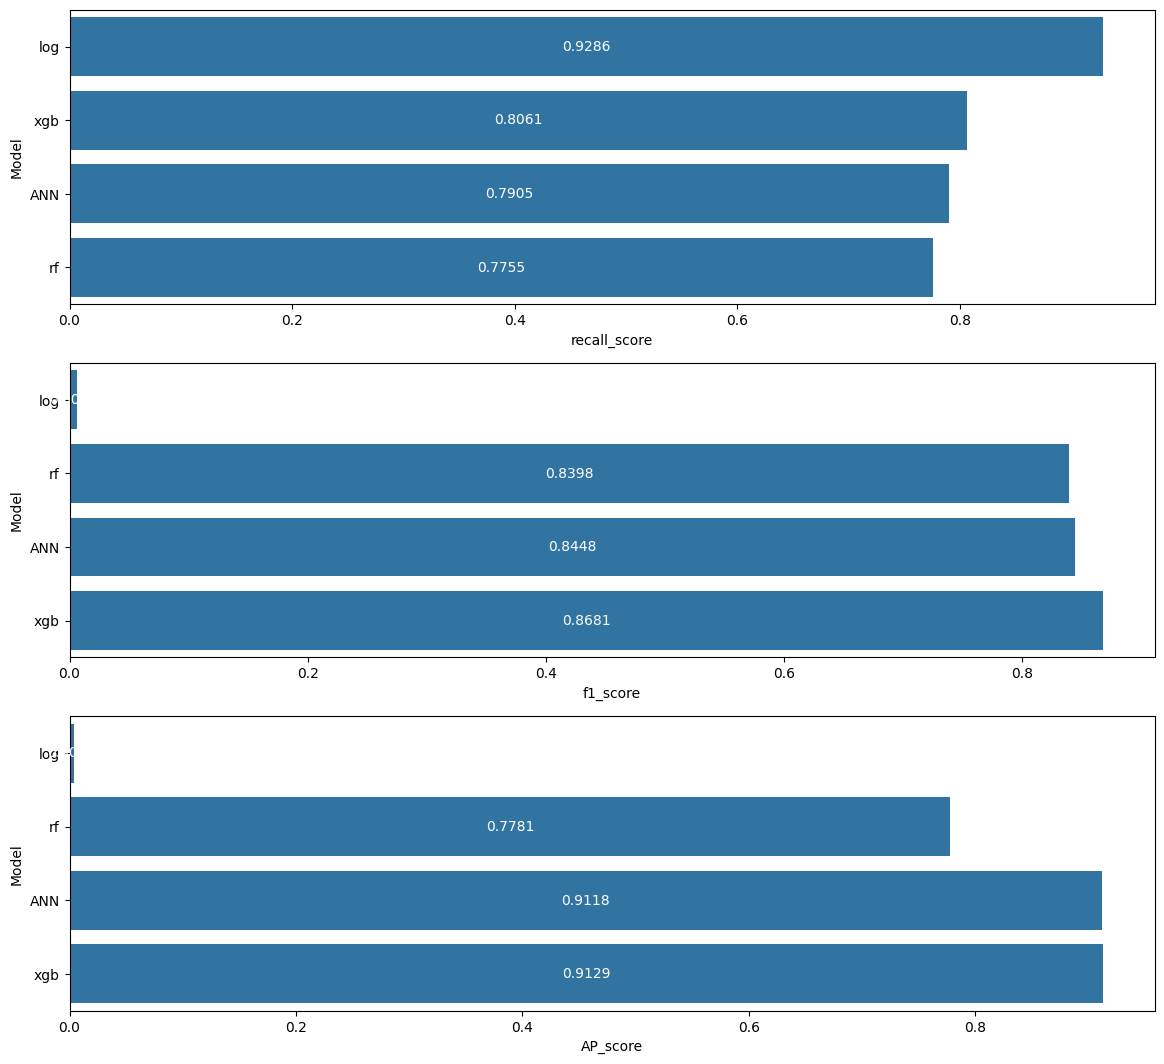

In [110]:
plt.figure(figsize=(14,13))

plt.subplot(311)
compare = compare.sort_values(by="recall_score", ascending=False)
ax=sns.barplot(x="recall_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(312)
compare = compare.sort_values(by="f1_score", ascending=True)
ax=sns.barplot(x="f1_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(313)
compare = compare.sort_values(by="AP_score", ascending=True)
ax=sns.barplot(x="AP_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white");

## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

In [111]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [117]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

In [123]:
class_weights_custom = {0: 1, 1: 9}
final_model = XGBClassifier(random_state=101,
                            scale_pos_weight=class_weights_custom[1],
                            learning_rate= 0.2,
                            colsample_bytree= 1,
                            max_depth= 3,
                            n_estimators=50,
                            subsample=0.8)

final_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=101, ...)

In [128]:
feature_imp = pd.DataFrame(data = final_model.feature_importances_, index = X_train.columns,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
feature_imp

Feature Importance
V14               0.428069
V10               0.054655
V17               0.046078
V4                0.037747
V12               0.031880
V7                0.027141
V18               0.026363
V11               0.025488
V2                0.022337
V5                0.021149
V6                0.020877
V1                0.019732
V28               0.019190
V26               0.018762
V8                0.018540
V20               0.016564
Amount            0.015822
V3                0.015363
V9                0.015112
V21               0.014780
V22               0.014408
V25               0.013646
V13               0.013302
V24               0.012188
V15               0.011783
V19               0.011211
V16               0.010667
V23               0.009464
V27               0.007681

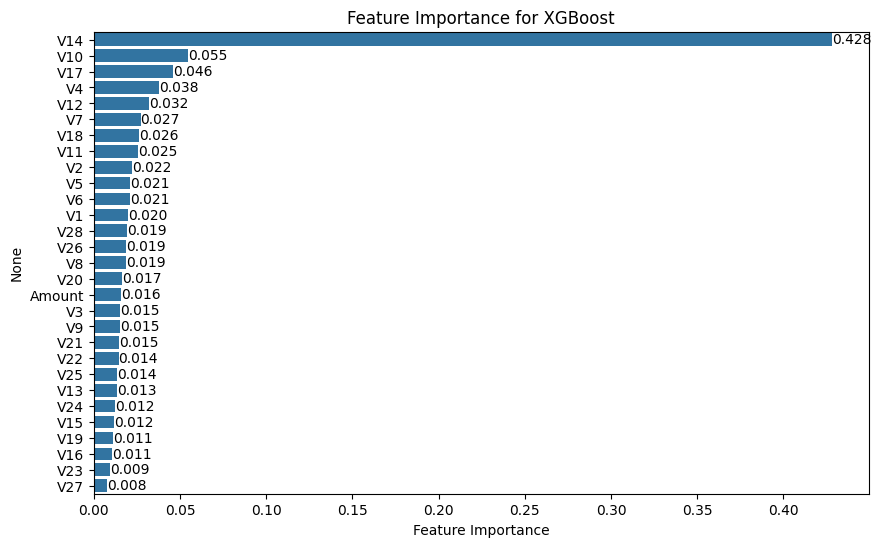

In [130]:
ax = sns.barplot(x=feature_imp["Feature Importance"], y=feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for XGBoost")
plt.show()

In [131]:
selected_features =feature_imp[feature_imp.values > 0.030]
selected_features

Feature Importance
V14            0.428069
V10            0.054655
V17            0.046078
V4             0.037747
V12            0.031880

In [136]:
X = X[selected_features.index]
X

V14       V10       V17        V4       V12
0      -0.311169  0.090794  0.207971  1.378155 -0.617801
1      -0.143772 -0.166974 -0.114805  0.448154  1.065235
2      -0.165946  0.207643  1.109969  0.379780  0.066084
3      -0.287924 -0.054952 -0.684093 -0.863291  0.178228
4      -1.119670  0.753074 -0.237033  0.403034  0.538196
...          ...       ...       ...       ...       ...
279863 -6.665177 -5.587794 -4.570529  1.749293 -5.417424
280143 -5.210141 -3.232153 -3.267116  1.411850 -3.096915
280149 -4.057162 -3.463891 -5.035326  0.468308 -2.775022
281144 -6.416628 -5.245984 -4.614717  1.817092 -5.030465
281674 -1.948883 -0.888722  0.903562  0.408670  0.728903

[283305 rows x 5 columns]

In [133]:
df_final = pd.concat([X,y], axis=1)
df_final.to_csv("Final_data.csv", index=False)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [138]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=101, ...)

In [139]:
eval_metric(final_model, X_train, y_train, X_test, y_test)

Test_Set
[[84824    32]
 [   20   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84856
           1       0.78      0.85      0.82       136

    accuracy                           1.00     84992
   macro avg       0.89      0.93      0.91     84992
weighted avg       1.00      1.00      1.00     84992


Train_Set
[[197881     76]
 [    61    295]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197957
           1       0.80      0.83      0.81       356

    accuracy                           1.00    198313
   macro avg       0.90      0.91      0.91    198313
weighted avg       1.00      1.00      1.00    198313



### Save and Export the Best Model


In [140]:
final_model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=101, ...)

In [143]:
my_dict = {
    "V14": 0.05,
    "V10": 0.46,
    "V17": -0.14,
    "V4": -0.5,
    "V12": 0.73,
}

new_obs = pd.DataFrame([my_dict])
new_obs

V14   V10   V17   V4   V12
0  0.05  0.46 -0.14 -0.5  0.73

In [144]:
final_model.predict(new_obs)

array([0])

In [148]:
with open('best_model_fraud_detection.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### Save and Export Variables

In [149]:
model = pickle.load(open("best_model_fraud_detection.pkl", "rb"))

In [150]:
model.predict(new_obs)

array([0])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___